In [1]:
import utils as ut
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pandas as pd



In [2]:

# 1.1. Documents
cisi = ut.Data('CISI.All', 'CISI.QRY','CISI.REL')
docs = cisi.read_doc()
docs_qrys, gp = cisi.call_doc_query_ground_proof()
two_docs = dict(list(docs.items())[0:2]) # First two documents



In [3]:
#1.3. Queries
quires = cisi.read_query()
dict(list(quires.items())[0:2]) # First two queries



{'1': 'What problems and concerns are there in making up descriptive titles? What difficulties are involved in automatically retrieving articles from approximate titles? What is the usual relevance of the content of articles to their titles?',
 '2': 'How can actually pertinent data, as opposed to references or entire articles themselves, be retrieved automatically in response to information requests?'}

In [4]:

# 1.4. Ground Proofs
gproofs = cisi.read_ground_proof()
dict(list(gproofs.items())[0:2]) # First two queries



{'1': ['28',
  '35',
  '38',
  '42',
  '43',
  '52',
  '65',
  '76',
  '86',
  '150',
  '189',
  '192',
  '193',
  '195',
  '215',
  '269',
  '291',
  '320',
  '429',
  '465',
  '466',
  '482',
  '483',
  '510',
  '524',
  '541',
  '576',
  '582',
  '589',
  '603',
  '650',
  '680',
  '711',
  '722',
  '726',
  '783',
  '813',
  '820',
  '868',
  '869',
  '894',
  '1162',
  '1164',
  '1195',
  '1196',
  '1281'],
 '2': ['29',
  '68',
  '197',
  '213',
  '214',
  '309',
  '319',
  '324',
  '429',
  '499',
  '636',
  '669',
  '670',
  '674',
  '690',
  '692',
  '695',
  '700',
  '704',
  '709',
  '720',
  '731',
  '733',
  '738',
  '740',
  '1136']}

In [5]:
# 2.4. Sparse matrix storage scheme
A = ut.Preprocess(docs_qrys) 
tdm = A.stem() # term-documents matrix
sparse_tdm = csr_matrix(tdm) # Compressed Sparse Row matrix
print(sparse_tdm[:2]) # print first two rows elements



  (0, 96)	1
  (0, 441)	1
  (0, 515)	1
  (0, 562)	2
  (0, 656)	1
  (0, 850)	1
  (0, 1325)	1
  (1, 816)	1


In [6]:
#2.5. Term weighting scheme
tdm_weigthed = csr_matrix(round(A.weighted(),2))
print(tdm_weigthed[:2]) # print weighted tdm first two rows' elemnts


  (0, 96)	2.34
  (0, 441)	2.34
  (0, 515)	2.34
  (0, 562)	4.68
  (0, 656)	2.34
  (0, 850)	2.34
  (0, 1325)	2.34
  (1, 816)	3.19


### Fitting different models

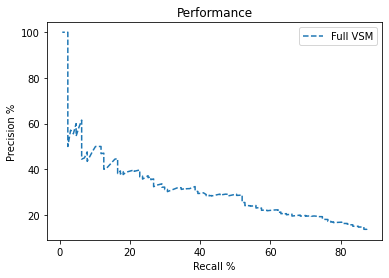

In [7]:

####### 3.3. Full Vector Matrix

tdm_gp = ut.InformationRetrievalAlgo(tdm, gproofs)
fv_rec, fv_pre = tdm_gp.full_vecvotr_matrix(11)
# plot
plt.title("Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fv_rec*100, fv_pre*100, '--', label = 'Full VSM') # full matrix
plt.legend()
plt.show()


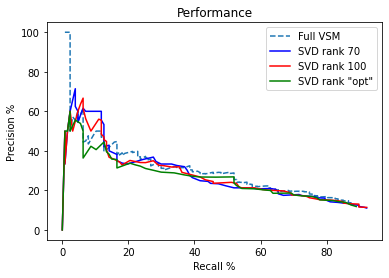

Rank-100 SVD approximation error:  67%
Rank-70 SVD approximation error:   72%
Rank-opt SVD approximation error:  44%


In [9]:

####### 3.4. Latent Semantic Structure
# lsi
lsi_70_rec, lsi_70_prec, lsi_70_apprx_error = tdm_gp.lsi_model(11, 70)
lsi_100_rec, lsi_100_prec, lsi_100_apprx_error = tdm_gp.lsi_model(11, 100)
lsi_opt_rec, lsi_opt_prec, lsi_opt_apprx_error = tdm_gp.lsi_model(11)

# plot
plt.title("Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fv_rec*100, fv_pre*100, '--', label = 'Full VSM') # full matrix
plt.plot(lsi_70_rec*100, lsi_70_prec*100, 'b', label = 'SVD rank 70') # SVD rank 70
plt.plot(lsi_100_rec*100, lsi_100_prec*100, 'r', label = 'SVD rank 100') # SVD rank 100
plt.plot(lsi_opt_rec*100, lsi_opt_prec*100, 'g', label = 'SVD rank "opt"') # SVD rank "opt
plt.legend()
plt.show()
# Approximation error
print('{:<35}{:}{:}'.format('Rank-100 SVD approximation error:',round(lsi_100_apprx_error[0] * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-70 SVD approximation error:',round(lsi_70_apprx_error[0] * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-opt SVD approximation error:',round(lsi_opt_apprx_error[0] * 100), '%'))



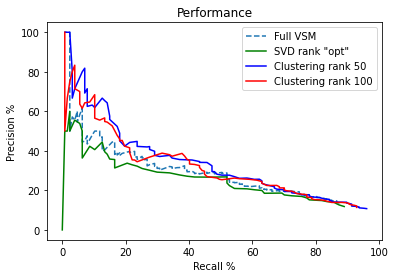

Rank-50 Clustering approximation error:79%
Rank-100 Clustering approximation error:73%
Rank-opt SVD approximation error:  44%


In [11]:
####### 3.5. Clustering
cls_50_rec, cls_50_prec, cls_50_apprx_error = tdm_gp.clustering_model(11, 50)
cls_100_rec, cls_100_prec, cls_100_apprx_error = tdm_gp.clustering_model(11, 100)

# plot
plt.title("Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fv_rec*100, fv_pre*100, '--', label = 'Full VSM') # full matrix
plt.plot(lsi_opt_rec*100, lsi_opt_prec*100, 'g', label = 'SVD rank "opt"') # SVD rank "opt"
plt.plot(cls_50_rec*100, cls_50_prec*100, 'b', label = 'Clustering rank 50') # Clustering rank 50
plt.plot(cls_100_rec*100, cls_100_prec*100, 'r', label = 'Clustering rank 100') # Clustering rank 100
plt.legend()
plt.show()
# Approximation error
print('{:<35}{:}{:}'.format('Rank-50 Clustering approximation error:',round(cls_50_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-100 Clustering approximation error:',round(cls_100_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-opt SVD approximation error:',round(lsi_opt_apprx_error[0] * 100), '%'))



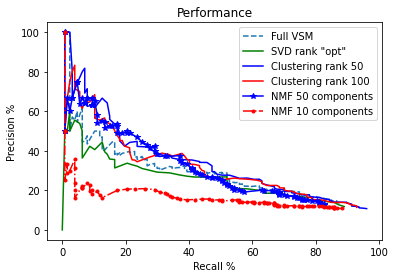

Rank-50 Clustering approximation error:79%
Rank-100 Clustering approximation error:73%
Rank-opt SVD approximation error:  44%
NMF 50 components  approximation error:74%
NMF 10 components approximation error:86%


In [12]:
####### 3.6. Nonnegative Matrix Factorization (NMF)
nmf_50_rec, nmf_50_prec, nmf_50_apprx_error = tdm_gp.nmf_model(11, 50)
nmf_10_rec, nmf_10_prec, nmf_10_apprx_error = tdm_gp.nmf_model(11, 10)

# plot
plt.title("Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fv_rec*100, fv_pre*100, '--', label = 'Full VSM') # full matrix
plt.plot(lsi_opt_rec*100, lsi_opt_prec*100, 'g', label = 'SVD rank "opt"') # SVD rank "opt"
plt.plot(cls_50_rec*100, cls_50_prec*100, 'b', label = 'Clustering rank 50') # Clustering rank 50
plt.plot(cls_100_rec*100, cls_100_prec*100, 'r', label = 'Clustering rank 100') # Clustering rank 100
plt.plot(nmf_50_rec*100, nmf_50_prec*100, '-*b', label = 'NMF 50 components') # NMF 50 components
plt.plot(nmf_10_rec*100, nmf_10_prec*100, '.-.r', label = 'NMF 10 components') # NMF 10 components

plt.legend()
plt.show()
# Approximation error
print('{:<35}{:}{:}'.format('Rank-50 Clustering approximation error:',round(cls_50_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-100 Clustering approximation error:',round(cls_100_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-opt SVD approximation error:',round(lsi_opt_apprx_error[0] * 100), '%'))
print('{:<35}{:}{:}'.format('NMF 50 components  approximation error:',round(nmf_50_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('NMF 10 components approximation error:',round(nmf_10_apprx_error * 100), '%'))




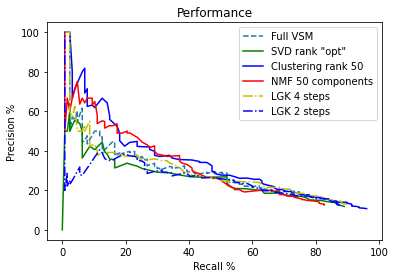

Rank-50 Clustering approximation error:79%
Rank-opt SVD approximation error:  44%
NMF 50 components approximation error:74%
LGK 4 steps approximation error:   91%
LGK 2 steps approximation error:   94%


In [13]:
####### 3.7. LGK Bidiagonalization

lgkb_4_rec, lgkb_4_prec, lgkb_4_apprx_error = tdm_gp.lgkb_model(11, 4)
lgkb_2_rec, lgkb_2_prec, lgkb_2_apprx_error = tdm_gp.lgkb_model(11,2)

# plot
plt.title("Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fv_rec*100, fv_pre*100, '--', label = 'Full VSM') # full matrix
plt.plot(lsi_opt_rec*100, lsi_opt_prec*100, 'g', label = 'SVD rank "opt"') # SVD rank "opt"
plt.plot(cls_50_rec*100, cls_50_prec*100, 'b', label = 'Clustering rank 50') # Clustering rank 50
plt.plot(nmf_50_rec*100, nmf_50_prec*100, 'r', label = 'NMF 50 components') # NMF 50 components
plt.plot(lgkb_4_rec*100, lgkb_4_prec*100,'-.y', label = 'LGK 4 steps') # LGK 4 steps
plt.plot(lgkb_2_rec*100, lgkb_2_prec*100,'-.b' ,label = 'LGK 2 steps') # LGK 2 steps

plt.legend()
plt.show()
# Approximation error
print('{:<35}{:}{:}'.format('Rank-50 Clustering approximation error:',round(cls_50_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('Rank-opt SVD approximation error:',round(lsi_opt_apprx_error[0] * 100), '%'))
print('{:<35}{:}{:}'.format('NMF 50 components approximation error:',round(nmf_50_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('LGK 4 steps approximation error:',round(lgkb_4_apprx_error * 100), '%'))
print('{:<35}{:}{:}'.format('LGK 2 steps approximation error:',round(lgkb_2_apprx_error * 100), '%'))



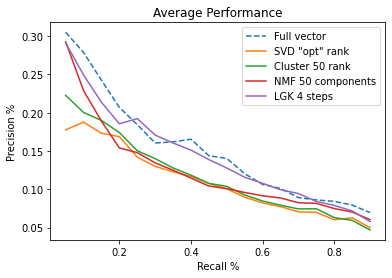

In [14]:
##### 4. Average Performance
tdm_gp = ut.AveragePerformance(tdm, gproofs)
fullv_recall_points, fullv_precision_values  = tdm_gp.average_full_vector_matrix(20)
lsi_opt_recall_points, lsi_opt_precision_values  = tdm_gp.average_lsi_model(20,'opt')
cls50_recall_points, cls50_precision_values  = tdm_gp.average_clustering_model(20,50)
nmf50_recall_points, nmf50_precision_values  = tdm_gp.average_nmf_model(20,50)
lgkb4_recall_points, lgkb4_precision_values  = tdm_gp.average_lgkb_model(20,4)

plt.title("Average Performance")
plt.ylabel('Precision %')
plt.xlabel('Recall %')
plt.plot(fullv_recall_points, fullv_precision_values,'--', label= 'Full vector')
plt.plot(lsi_opt_recall_points, lsi_opt_precision_values, label = 'SVD "opt" rank')
plt.plot(cls50_recall_points, cls50_precision_values, label = 'Cluster 50 rank')
plt.plot(nmf50_recall_points, nmf50_precision_values, label = 'NMF 50 components')
plt.plot(lgkb4_recall_points, lgkb4_precision_values, label = 'LGK 4 steps')

plt.legend()
plt.show()

